In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [63]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

Об этом файле

https://www.kaggle.com/bachrr/covid-chest-xray

Patientid (внутренний идентификатор, только для этого набора данных)

смещение (количество дней с момента появления симптомов или госпитализации для каждого изображения, это очень важно, 
когда есть несколько изображений для одного и того же пациента, чтобы отслеживать прогрессирование во время визуализации.
Если в отчете указано «через несколько дней», предположим 5 дней.)

пол (M, F или пусто)

возраст (возраст пациента в годах)

обнаружение (какая пневмония)

выживание (выжили ли они? Да или Нет)

вид (например, PA, AP или L для рентгеновских лучей и Axial или Coronal для компьютерной томографии)

модальность (КТ, рентген или что-то еще
)
дата (дата получения изображения)

расположение (название больницы, город, штат, страна) важность справа налево.
имя файла

doi (DOI исследовательской статьи)

url (URL-адрес статьи или веб-сайта, с которого было получено изображение)

лицензия

клинические записи (в частности, о рентгенограмме, а не только о пациенте)

другие примечания (например, кредит)

In [64]:
data = pd.read_csv('metadata.csv')

In [65]:
df = data[['patientid', 'offset', 'sex', 'age', 'finding', 'survival', 'date']]
df

,patientid,offset,sex,age,finding,survival,date
0,2,0.0,M,65.0,COVID-19,Y,"January 22, 2020"
1,2,3.0,M,65.0,COVID-19,Y,"January 25, 2020"
2,2,5.0,M,65.0,COVID-19,Y,"January 27, 2020"
3,2,6.0,M,65.0,COVID-19,Y,"January 28, 2020"
4,4,0.0,F,52.0,COVID-19,NaN,"January 25, 2020"
...,...,...,...,...,...,...,...
367,205,11.0,M,55.0,COVID-19,Y,NaN
368,205,13.0,M,55.0,COVID-19,Y,NaN
369,205,20.0,M,55.0,COVID-19,Y,NaN
370,205,24.0,M,55.0,COVID-19,Y,NaN


### Посмотрим в каком возрасте заражение пациентов было больше всего.

Т.к. для одного пациента делали несколько раз снимки, то при следующих расчетах будем учитывать каждого пациента 
только один раз.

In [66]:
Age = df.groupby(['patientid','age']).agg({'sex':'count'}).sort_values(by='age').reset_index()
Age_sort = Age.groupby('age').agg({'patientid':'count'}).sort_values(by='age').reset_index()
Age_sort.head()

,age,patientid
0,12.0,1
1,23.0,2
2,25.0,4
3,27.0,1
4,28.0,1


Text(0, 0.5, 'Пациенты')

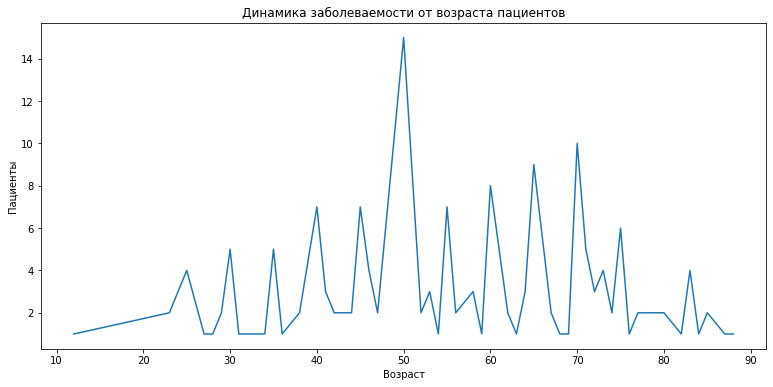

In [67]:
plt.plot( Age_sort.age, Age_sort.patientid)

plt.title('Динамика заболеваемости от возраста пациентов')
plt.xlabel('Возраст')
plt.ylabel('Пациенты')

Видно из графика, что данных довольно мало и он имеет пикообразный характер.

Также прослеживается динамика увеличения числа пациентов с их возрастом. 

Наибольше всего было пациентов в возрасте 50 лет.


### Сколько пациентов вижило?

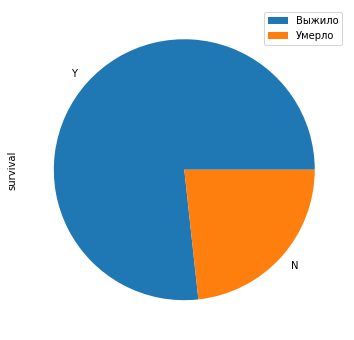

In [68]:
Survival =  df[['patientid', 'survival']].survival.value_counts()
Survival.plot(kind='pie').legend(['Выжило', 'Умерло'])

### Какое соотношение мужчин и женщин?

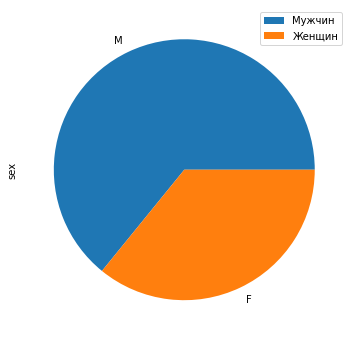

In [69]:
Sex = df[['patientid','sex']].sex.value_counts()
Sex.plot(kind='pie').legend(['Мужчин', 'Женщин'])

### Какие заболевания были еще и в каком соотношении к "COVID-19"

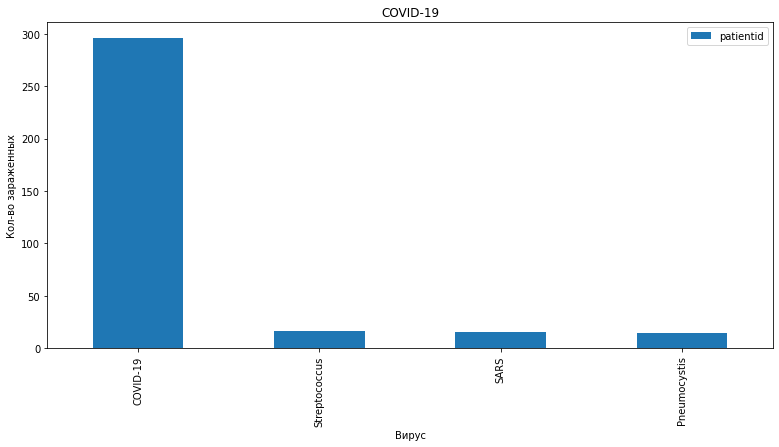

In [70]:
Virus = df.groupby(['finding']).agg({'patientid':'count'}).sort_values(by='patientid', ascending=False)
Virus.loc[['COVID-19','Streptococcus','SARS','Pneumocystis']].plot(kind='bar', 
                                                                title='COVID-19',
                                                                 xlabel='Вирус',
                                                                 ylabel='Кол-во зараженных')

### В каком возрасте смертность пациентов выше?

In [71]:
Survival2 = df.groupby(['patientid','age','survival']).agg({'sex':'count'}).reset_index()
Survival2.loc[Survival2.survival.isin(['Y']), 'Y'] = 'Y'
Survival2.loc[Survival2.survival.isin(['N']), 'N'] = 'N'
Survival2 = Survival2[['age', 'Y', 'N']]
Survival2 = Survival2.groupby(['age']).count()
Survival2.head()

,Y,N
age,,
23.0,1,0
25.0,1,0
29.0,2,0
31.0,1,0
35.0,1,0


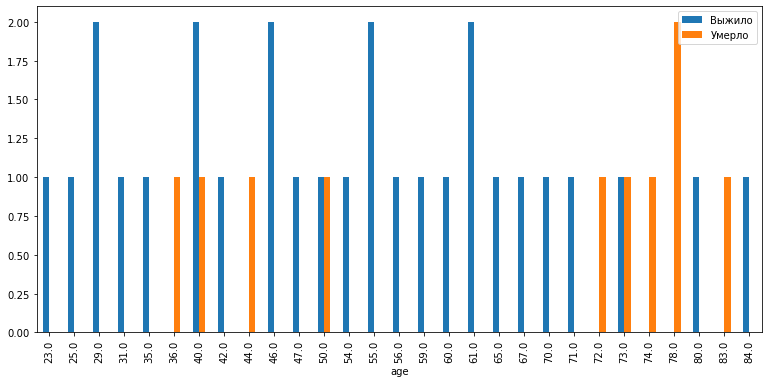

In [72]:
Survival2.plot(kind='bar').legend(['Выжило', 'Умерло'])

График не дает целостность картины из зы малого колическва данных, но мы видим, что у пожилых людей смертность больше.